In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
%matplotlib inline

In [23]:
df= pd.read_csv('Churn_Modelling.csv')

In [24]:
df.shape

(10000, 14)

In [25]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8313,8314,15750121,Tung,639,France,Male,38,3,0.00,1,1,0,42862.82,0
6480,6481,15693704,Tsou,679,France,Female,24,6,114948.76,2,0,1,135768.25,0
7192,7193,15644400,Anderson,709,France,Male,44,9,128601.98,1,1,0,117031.20,0
709,710,15734886,Mazzi,686,France,Female,34,3,123971.51,2,1,0,147794.63,0
9515,9516,15792922,Tu,639,Spain,Male,38,9,130233.14,1,1,1,81861.10,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [28]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [29]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [30]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
cat_cols=['Geography','Gender']
num_cols=[col for col in df.columns if col not in cat_cols]

In [32]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [33]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [34]:
df=pd.get_dummies(data=df, columns=['Geography'])

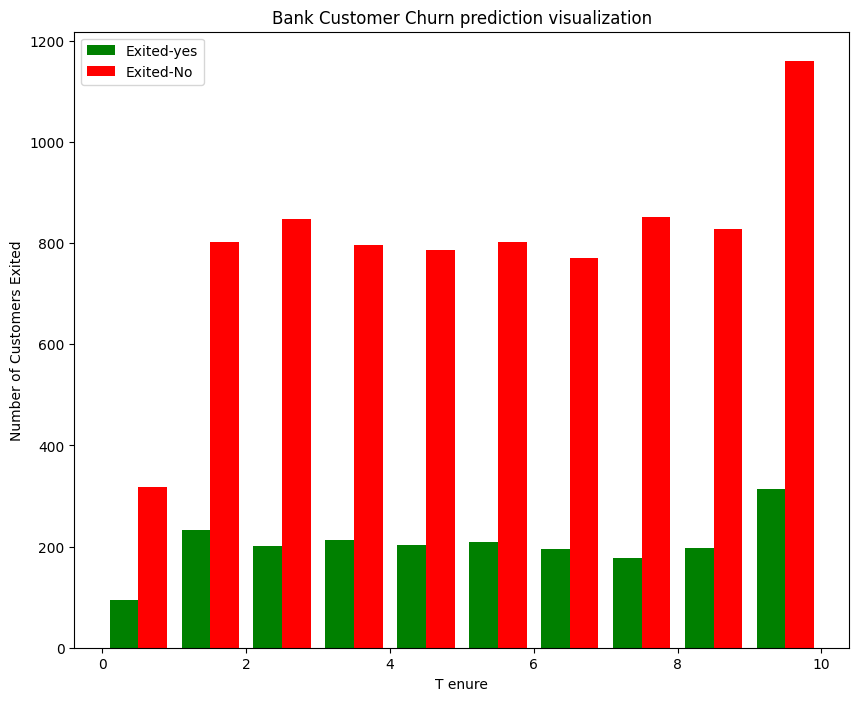

In [35]:
tenure_exited_0=df[df.Exited==0].Tenure
tenure_exited_1=df[df.Exited==1].Tenure

plt.figure(figsize=(10,8))
plt.xlabel('T enure')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([tenure_exited_1,tenure_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

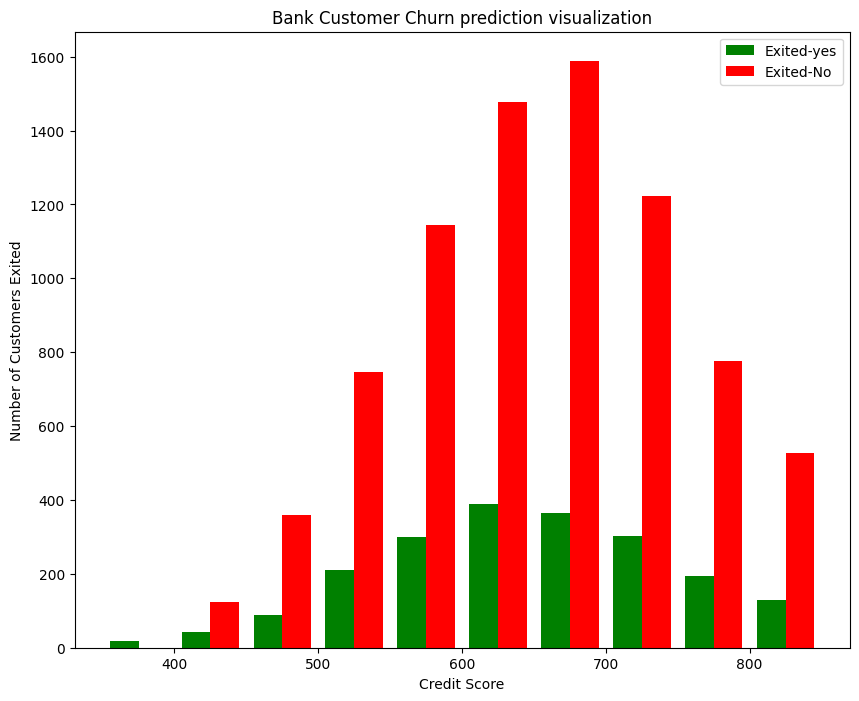

In [36]:
creditscore_exited_0=df[df.Exited==0].CreditScore
creditscore_exited_1=df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_exited_1,creditscore_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [38]:
# Scaling
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [39]:
# Training
x=df.drop('Exited',axis=1)
y=df.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [40]:
def ANN(xtrain,xtest,ytrain,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred

In [41]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 0.5305 - accuracy: 0.7603
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.8019
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.8061
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.8101
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8120
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.8147
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8184
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8193
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8215
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4017 - accura

Text(95.72222222222221, 0.5, 'Truth')

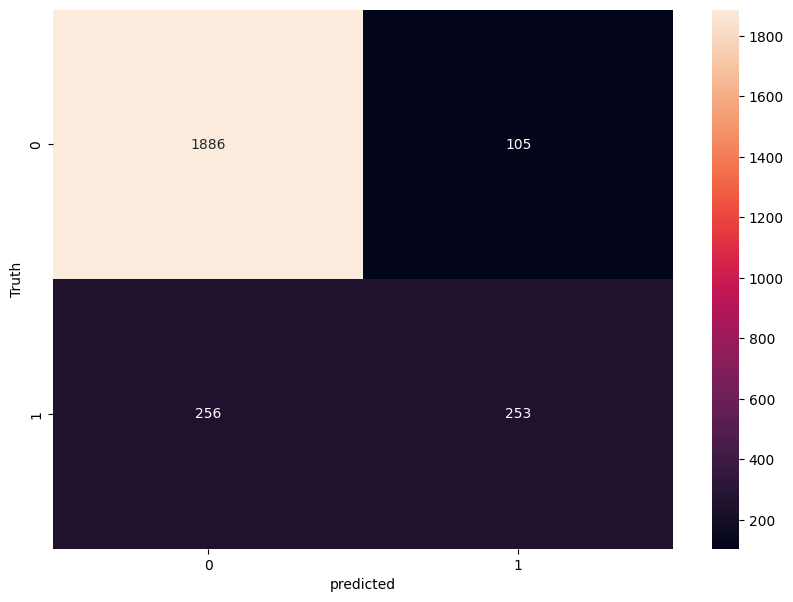

In [42]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')